In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from skimage.io import imread
im = imread('/home/tamerlan/CV/task1/img.png', plugin='matplotlib')
implot = plt.imshow(im)

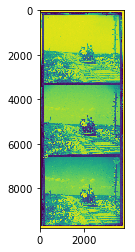

In [328]:
im*=255
plt.imshow(im)
plt.show()

In [329]:
h = im.shape[0]//3;
data = np.zeros( (h,im.shape[1],3), dtype=np.uint8)

In [330]:
deltaX = h*10//100
deltaY = im.shape[1]*10//100
R = im[deltaX:h-deltaX, deltaY :im.shape[1] -deltaY]
G = im[h+deltaX:h*2-deltaX,   deltaY :im.shape[1] -deltaY]
B = im[h*2+deltaX:h*3-deltaX,   deltaY :im.shape[1] -deltaY]

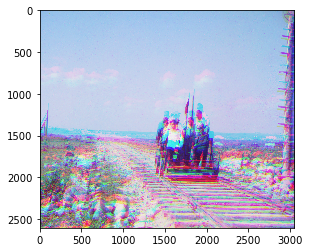

In [331]:
#R = im[:h]
#G = im[h:h*2]
#B = im[h*2:h*3]

data = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)
data[...,0] = R
data[...,1] = G
data[...,2] = B

data[...,0] = B
data[...,1] = G
data[...,2] = R
plt.imshow(data)
plt.show()

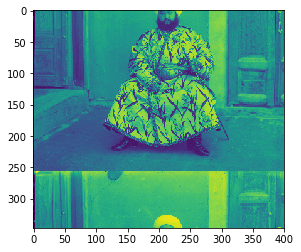

In [84]:

plt.imshow(np.roll(R,256,0))
plt.show()

In [208]:
from skimage import measure
def mse(Im1,Im2):
    corr_min = float("inf")
    x_shift = 0
    y_shift = 0
    for x in range(-15,15):
        for y in range(-15,15):
            corr = 0
            T = Im1
            S = np.roll(np.roll(Im2,x,1),y,0)
            #C = (T - S)
            #C = C*C
            #corr = np.sum(C) / (T.shape[0]*T.shape[1])
            corr = measure.compare_mse(T,S)
            if (corr < corr_min):
                #print(corr_min,x_shift,y_shift)
                #print(corr,x,y)
                corr_min = corr
                x_shift = x
                y_shift = y
    return y_shift,x_shift

from math import sqrt
def corr(Im1,Im2):
    corr_max = float("-inf")
    x_shift = 0
    y_shift = 0
    temp1 = Im1*Im1
    temp2 = Im2*Im2
    d = sqrt(np.sum(temp1)*np.sum(temp2))
    for x in range(-15,15):
        for y in range(-15,15):
            corr = 0
            T = Im1
            S = np.roll(np.roll(Im2,x,1),y,0)
            C = T*S
            corr = np.sum(C) / d
            if (corr > corr_max):
                corr_max = corr
                x_shift = x
                y_shift = y
    return y_shift,x_shift

In [188]:
g = corr(R,G)
b = corr(R,B)

#g = mse(R,G)
#b = mse(R,B)

In [189]:
print(g)
print(b)

(10, 9)
(9, 7)


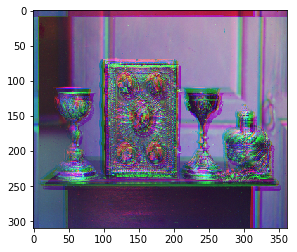

In [190]:
temp1 = np.roll(B,b[1],1)
temp1 = np.roll(temp1,b[0],0)
temp2 = np.roll(G,g[1],1)
temp2 = np.roll(temp2,g[0],0)
data = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)
data[...,0] = R
data[...,1] = temp2
data[...,2] = temp1
plt.imshow(data)
plt.show()

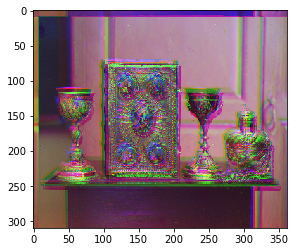

In [191]:
data[...,0] = temp1
data[...,1] = temp2
data[...,2] = R
plt.imshow(data)
plt.show()

In [192]:
def new_corr(Im1,Im2):
    corr_max = float("-inf")
    w = Im1.shape[0] 
    h = Im1.shape[1]
    x_shift = 0
    y_shift = 0
    for x in range(-15,15):
        for y in range(-15,15):
            if x > 0 and y > 0: 
                T = Im1[x: w - 1,y: h - 1]
                S = Im2[0: w - 1 - x, 0: h - 1 - y]
            elif x <= 0 and y > 0 :
                T = Im1[0: w - 1 + x,y: h - 1]
                S = Im2[ - x: w - 1, 0: h - 1 - y]
            elif x > 0 and y <= 0 :
                T = Im1[x: w - 1, 0: h - 1 + y]
                S = Im2[0: w - 1 - x , - y: h - 1]
            else :
                T = Im1[0: w - 1 + x, 0: h - 1 + y]
                S = Im2[ - x: w - 1, -y: h - 1]
            temp1 = T*T
            temp2 = S*S
            d = sqrt(np.sum(temp1)*np.sum(temp2))
            corr = 0
            C = T*S
            corr = np.sum(C) / d
            if (corr > corr_max):
                corr_max = corr
                x_shift = x
                y_shift = y
    return x_shift,y_shift

def new_mse(Im1,Im2):
    corr_min = float("inf")
    w = Im1.shape[0] 
    h = Im1.shape[1]
    x_shift = 0
    y_shift = 0
    for x in range(-15,15):
        for y in range(-15,15):
            if x > 0 and y > 0: 
                T = Im1[x: w - 1,y: h - 1]
                S = Im2[0: w - 1 - x, 0: h - 1 - y]
            elif x <= 0 and y > 0 :
                T = Im1[0: w - 1 + x,y: h - 1]
                S = Im2[ - x: w - 1, 0: h - 1 - y]
            elif x > 0 and y <= 0 :
                T = Im1[x: w - 1, 0: h - 1 + y]
                S = Im2[0: w - 1 - x , - y: h - 1]
            else :
                T = Im1[0: w - 1 + x, 0: h - 1 + y]
                S = Im2[ - x: w - 1, -y: h - 1]
            C = (T - S)*(T - S)
            corr = np.sum(C) / (T.shape[0]*T.shape[1])
            if (corr < corr_min):
                corr_min = corr
                x_shift = x
                y_shift = y
    return x_shift,y_shift

(10, 9)
(-15, 8)


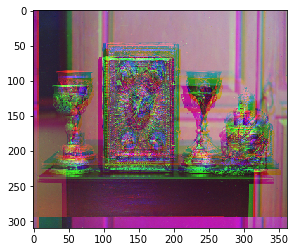

In [193]:
r = new_corr(G,R)
b = new_corr(G,B)
print(g)
print(b)
temp1 = np.roll(B,b[0],0)
temp1 = np.roll(temp1,b[1],1)
temp2 = np.roll(R,r[1],1)
temp2 = np.roll(temp2,r[0],0)
data = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)
data[...,0] = temp1
data[...,1] = G
data[...,2] = temp2
plt.imshow(data)
plt.show()

(13, 3)
(13, -15)


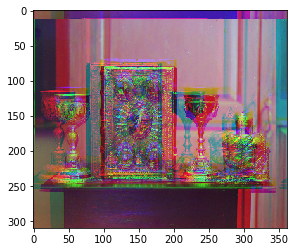

In [209]:
g = mse(R,G)
b = mse(R,B)
print(g)
print(b)
temp1 = np.roll(B,b[1],1)
temp1 = np.roll(temp1,b[0],0)
temp2 = np.roll(G,g[1],1)
temp2 = np.roll(temp2,g[0],0)
data = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)
data[...,0] = temp1
data[...,1] = temp2
data[...,2] = R
plt.imshow(data)
plt.show()

(14, 3)
(13, -15)


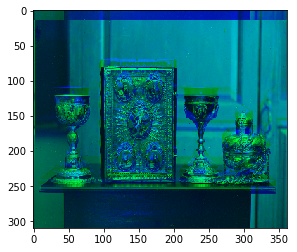

In [195]:
g = new_mse(R,G)
b = new_mse(R,B)
print(g)
print(b)
temp1 = np.roll(B,b[0],0)
temp1 = np.roll(temp1,b[1],1)
temp2 = np.roll(G,g[1],1)
temp2 = np.roll(temp2,g[0],0)
data = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)
#data[...,0] = temp1
data[...,1] = temp2
data[...,2] = R
plt.imshow(data)
plt.show()

(-3, 1)
(9, -1)


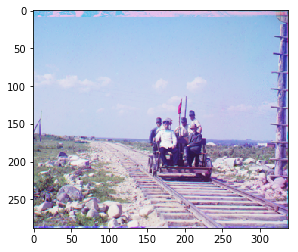

In [215]:
from skimage import measure
def min_coord_mse(Im1,Im2):
    mse_min = float("+inf")
    x_shift = 0
    y_shift = 0
    for x in range(-15,15):
        for y in range(-15,15):
            T = Im1
            S = np.roll(np.roll(Im2,x,1),y,0)
            mse = measure.compare_mse(T,S)
            if (mse < mse_min):
                mse_min = mse
                x_shift = x
                y_shift = y
    return y_shift,x_shift
r = min_coord_mse(G,R)
b = min_coord_mse(G,B)
print(r)
print(b)
temp1 = np.roll(R,r[0],0)
temp1 = np.roll(temp1,r[1],1)

temp2 = np.roll(B,b[1],1)
temp2 = np.roll(temp2,b[0],0)
data = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)

#temp2 = np.roll(B,2,1)
#temp2 = np.roll(temp2,7,0)
data[...,0] = temp2
data[...,1] = G
data[...,2] = temp1
plt.imshow(data)
plt.show()

In [137]:
T = G
S = np.roll(np.roll(B,2,1),7,0)
mse_orig = measure.compare_mse(T,S)

T = G
S = np.roll(np.roll(B,11,1),-15,0)
mse_exp = measure.compare_mse(T,S)
print(mse_orig)
print(mse_exp)

1765.69595101
3083.91377569


In [207]:
print(mse(G,R))

(-3, -2)


In [245]:
def compress(img):
    return measure.block_reduce(img,(2,2))

plus
(-24, 8)
(80, -8)


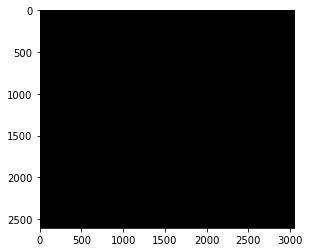

In [318]:
if (G.shape[0]>512 or G.shape[1]>512):
    G_small = G
    R_small = R
    B_small = B
    k = 0
    while (R_small.shape[0]>512 and R_small.shape[1]>512):
        k = k + 1
        R_small = compress(R_small)
        G_small = compress(G_small)
    r = min_coord_mse(G_small,R_small)
    r_0 = r[0]*(2**k)
    r_1 = r[1]*(2**k)
    r = (r_0,r_1)
    
    
    T = G
    S = np.roll(np.roll(R,r_1,1),r_0,0)
    mse = measure.compare_mse(T,S)
    S = np.roll(np.roll(R,r_1+2**k,1),r_0+2**k,0)
    mse_plus = measure.compare_mse(T,S)
    S = np.roll(np.roll(R,r_1-2**k,1),r_0-2**k,0)
    mse_minus = measure.compare_mse(T,S)
    if (mse_minus < mse and mse_minus< mse_plus):
        r = (r_0 - 2**k,r_1 - 2**k)
        print("minus")
    elif (mse_minus > mse_plus and mse > mse_plus):
        r = (r_0 + 2**k,r_1 + 2**k)
        print("plus")
    
    k = 0
    #G_small = G
    while (B_small.shape[0]>512 and B_small.shape[1]>512):
        k = k + 1
        B_small = compress(B_small)
        #G_small = compress(G_small)
    b = min_coord_mse(G_small,B_small)
    b_0 = b[0]*(2**k)
    b_1 = b[1]*(2**k)
    b = (b_0,b_1)
    
    S = np.roll(np.roll(B,b_1,1),b_0,0)
    mse = measure.compare_mse(T,S)
    S = np.roll(np.roll(B,b_1+2**k,1),b_0+2**k,0)
    mse_plus = measure.compare_mse(T,S)
    S = np.roll(np.roll(B,b_1-2**k,1),b_0-2**k,0)
    mse_minus = measure.compare_mse(T,S)
    if (mse_minus < mse and mse_minus< mse_plus):
        b = (b_0 - 2**k,b_1 - 2**k)
        print("minus")
    elif (mse_minus > mse_plus and mse > mse_plus):
        b = (b_0 + 2**k,b_1 + 2**k)
        print("plus")
else :
    r = min_coord_mse(G,R)
    b = min_coord_mse(G,B)
    
print(r)
print(b)
temp1 = np.roll(R,r[0],0)
temp1 = np.roll(temp1,r[1],1)

temp2 = np.roll(B,b[1],1)
temp2 = np.roll(temp2,b[0],0)
data = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)

#temp2 = np.roll(B,2,1)
#temp2 = np.roll(temp2,7,0)
data[...,0] = temp2
data[...,1] = G
data[...,2] = temp1
plt.imshow(data)
plt.show()

In [319]:
print(r)
print(b)

(-24, 8)
(80, -8)


In [320]:
from skimage.io import imsave
imsave('/home/tamerlan/CV/task1/out.png', data)

/home/tamerlan/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/tamerlan/CV/task1/out.png is a low contrast image
  warn('%s is a low contrast image' % fname)


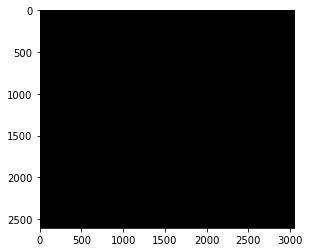

In [323]:
plt.imshow(data)
plt.show()

In [326]:
data[...,1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [2]:
im = imread('/home/tamerlan/nalign.jpg', plugin='matplotlib')
implot = plt.imshow(im)

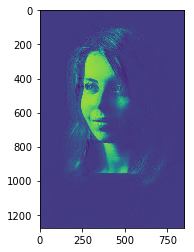

In [6]:
plt.imshow(im[...,2])
plt.show()

In [7]:
import numpy as np
from math import sqrt
from skimage import measure

def EnvironsCheck(Im1,Im2,y,x,compress_coef):
    mse_min = float("+inf")
    x_shift = 0
    y_shift = 0
    T = Im1
    for j in range(y - compress_coef,y + compress_coef):
        for i in range(x - compress_coef,x + compress_coef):
            S = np.roll(np.roll(Im2,i,1),j,0)
            mse = measure.compare_mse(T,S)
            if (mse < mse_min):
                mse_min = mse
                x_shift = i
                y_shift = j
    return y_shift,x_shift

def compress(img):
    return measure.block_reduce(img,(2,2))

def min_coord_mse(Im1,Im2):
    mse_min = float("+inf")
    x_shift = 0
    y_shift = 0
    for x in range(-15,15):
        for y in range(-15,15):
            T = Im1
            S = np.roll(np.roll(Im2,x,1),y,0)
            mse = measure.compare_mse(T,S)
            if (mse < mse_min):
                mse_min = mse
                x_shift = x
                y_shift = y
    return y_shift,x_shift

def align(im, g_coord):
    im = im * 255
    h = im.shape[0] // 3
    deltaX = h*15 // 100
    deltaY = im.shape[1]*15//100
    B = im[      deltaX:  h - deltaX,  deltaY :im.shape[1] -deltaY]
    G = im[  h + deltaX:2*h - deltaX,  deltaY :im.shape[1] -deltaY]
    R = im[2*h + deltaX:3*h - deltaX,  deltaY :im.shape[1] -deltaY]
    
    if (G.shape[0]>512 or G.shape[1]>512):
        G_small = G
        R_small = R
        B_small = B
        compress_coef = 1
        while (R_small.shape[0]>512 and R_small.shape[1]>512):
            compress_coef = compress_coef * 2
            R_small = compress(R_small)
            G_small = compress(G_small)
            B_small = compress(B_small)
        r = min_coord_mse(G_small,R_small)
        r_0 = r[0]*compress_coef
        r_1 = r[1]*compress_coef
        r = EnvironsCheck(G,R,r_0,r_1,compress_coef//2)
        
        b = min_coord_mse(G_small,B_small)
        b_0 = b[0]*compress_coef
        b_1 = b[1]*compress_coef
        b = EnvironsCheck(G,B,b_0,b_1,compress_coef//2)
    else :
        r = min_coord_mse(G,R)
        b = min_coord_mse(G,B)
    
    B_aligned = np.roll(B,b[0],0)
    B_aligned = np.roll(B_aligned,b[1],1)

    R_aligned = np.roll(R,r[1],1)
    R_aligned = np.roll(R_aligned,r[0],0)
    
    aligned_img = np.zeros( (R.shape[0],R.shape[1],3), dtype=np.uint8)
    aligned_img[...,0] = R_aligned
    aligned_img[...,1] = G
    aligned_img[...,2] = B_aligned
    return aligned_img,  (g_coord[0] - b[0] - h, g_coord[1] - b[1] ), (g_coord[0] - r[0] + h, g_coord[1] - r[1] )

In [22]:
temp = np.concatenate((im[...,2],im[...,1],im[...,0]))

In [1]:
g_coord = (0, 0)
aligned_img, (b_row, b_col), (r_row, r_col) = align(temp, g_coord)
plt.imshow(255-aligned_img)
plt.show()

NameError: name 'align' is not defined

In [ ]:
from skimage.io import imsave
save()